In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesDataNumeric=pd.read_pickle('CarPricesDataNumeric.pkl')
print('Shape before deleting duplicate values:', CarPricesDataNumeric.shape)

# Removing duplicate rows if any
CarPricesDataNumeric=CarPricesDataNumeric.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesDataNumeric.shape)

CarPricesDataNumeric.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (1428, 12)
Shape After deleting duplicate values: (1428, 12)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [2]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999,)
(429, 11)
(429,)


## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[22:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,16441.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,7960.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,11555.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,13595.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,9924.0


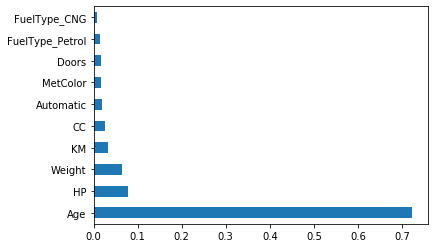

In [4]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### Plotting a single Decision tree out of XGBoost

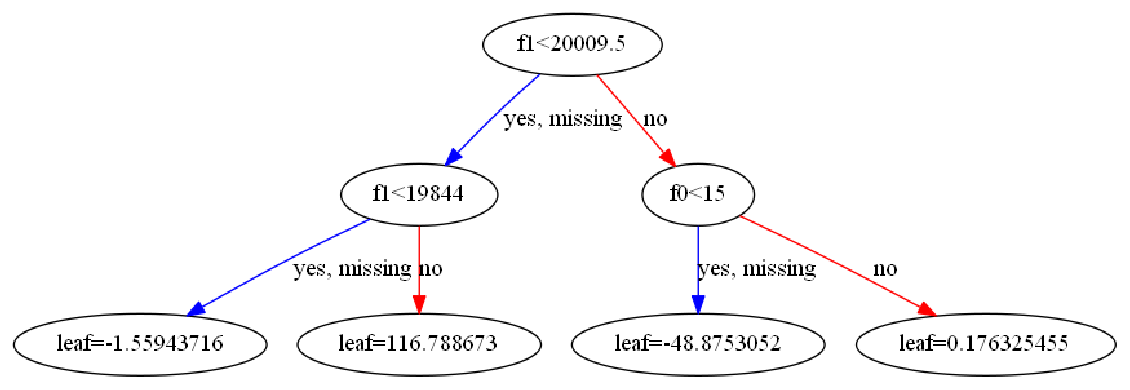

In [5]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, subplot = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=500, ax=subplot)